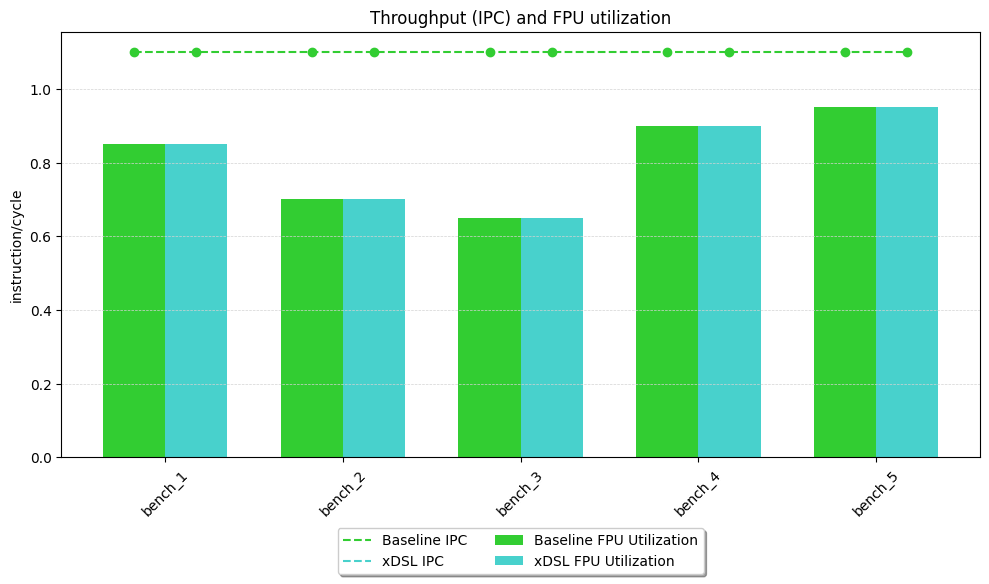

In [39]:
import io
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Benchmark name, class, data type, total_ipc (inst/cycle), fpss_fpu_occupancy (inst/cycle)
TESTDATA = """
name, class, dtype, total_ipc, fpss_fpu_occupancy
bench_1, baseline, fp8,  1.1, 0.85
bench_1, xdsl, fp8,  1.1, 0.85
bench_2, baseline, fp8,  1.1, 0.7
bench_2, xdsl, fp8,  1.1, 0.7
bench_3, baseline, fp16,  1.1, 0.65
bench_3, xdsl, fp16,  1.1, 0.65
bench_4, baseline, fp32,  1.1, 0.9
bench_4, xdsl, fp32,  1.1, 0.9
bench_5, baseline, fp64,  1.1, 0.95
bench_5, xdsl, fp64,  1.1, 0.95
"""

df = pd.read_csv(io.StringIO(TESTDATA), sep=",", skipinitialspace=True)

CMAP = {"baseline": "limegreen", "xdsl": "mediumturquoise"}
##################################################

# Get unique 'name' values as bins
bins = df["name"].unique()
num_bins = len(bins)

# Group by 'name'
grouped = df.groupby("name")

# Prepare data for plotting
x_values = np.arange(num_bins)  # X-axis positions
bar_width = 0.35  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each group
for i, (name, group) in enumerate(grouped):
    ax.bar(
        x_values[i] - bar_width / 2,
        group["fpss_fpu_occupancy"].values[0],
        width=bar_width,
        label=name + "_baseline",
        color=CMAP["baseline"],
    )
    ax.bar(
        x_values[i] + bar_width / 2,
        group["fpss_fpu_occupancy"].values[1],
        width=bar_width,
        label=name + "_xdsl",
        color=CMAP["xdsl"],
    )

    # Superimpose points with x coordinate aligned with histogram bar and y value from 'total_ipc' column
    ax.scatter(
        [x_values[i] - bar_width / 2, x_values[i] + bar_width / 2],
        [group["total_ipc"].values[0], group["total_ipc"].values[1]],
        color=CMAP["baseline"],
        zorder=5,
    )

# Collect all the data points
x_data = []
y_data = []
for i, (name, group) in enumerate(grouped):
    x_data.extend([x_values[i] - bar_width / 2, x_values[i] + bar_width / 2])
    y_data.extend([group["total_ipc"].values[0], group["total_ipc"].values[1]])

# Connect all the points with a single dashed line
ax.plot(x_data, y_data, linestyle="--", color=CMAP["baseline"], zorder=0)

ax.grid(axis="y", color="lightgrey", linestyle="--", linewidth=0.5)

legend_elements = [
    Line2D([0], [0], color=CMAP["baseline"], linestyle="--", label="Baseline IPC"),
    Line2D([0], [0], color=CMAP["xdsl"], linestyle="--", label="xDSL IPC"),
    Patch(facecolor=CMAP["baseline"], label="Baseline FPU Utilization"),
    Patch(facecolor=CMAP["xdsl"], label="xDSL FPU Utilization"),
]
ax.legend(
    handles=legend_elements,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    shadow=True,
    ncol=2,
)
# Set x-axis ticks and labels
ax.set_xticks(x_values)
ax.set_xticklabels(bins, rotation=45)
ax.set_ylabel("instruction/cycle")
ax.set_title("Throughput (IPC) and FPU utilization")
plt.tight_layout()
plt.show()